In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

"""
Team:           Python is Fun
Members:        Stephen, Carlos, Erica
Description:    This script is designed to analyze the inter-annotator agreement between two 
                annotators using Cohen's Kappa score and a confusion matrix.
                I went ahead and used functions to make the code more resuable.  I also added 
                a heatmap to visualize the confusion matrix.  I know we have not covered 
                Pandas or Seaborn in class yet; however, I have used them in the past and 
                thought they would be useful for this assignment. 
"""
def load_annotations(file_path, col1, col2):
    """
    Load annotation columns from an Excel file into NumPy arrays.
    """
    df = pd.read_excel(file_path)
    ann1 = df[col1].to_numpy()
    ann2 = df[col2].to_numpy()
    return ann1, ann2

def analyze_kappa(ann1, ann2, label1="Annotator 1", label2="Annotator 2", title="Confusion Matrix"):
    """
    Calculate Cohen's Kappa, print it, and display a labeled confusion matrix heatmap.
    """
    # Cohen's Kappa
    kappa = cohen_kappa_score(ann1, ann2)
    print(f"\nCohen's Kappa between {label1} and {label2}: {kappa:.4f}")

    # Confusion matrix
    cm = confusion_matrix(ann1, ann2, labels=[0, 1])
    cm_df = pd.DataFrame(
        cm,
        index=[f"{label1}_0", f"{label1}_1"],
        columns=[f"{label2}_0", f"{label2}_1"]
    )

    print("\nConfusion Matrix:")
    print(cm_df)

    # Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.tight_layout()
    plt.show()



Cohen's Kappa between AMCS and DFBees: 0.3492

Confusion Matrix:
        DFBees_0  DFBees_1
AMCS_0       925        55
AMCS_1         3        17


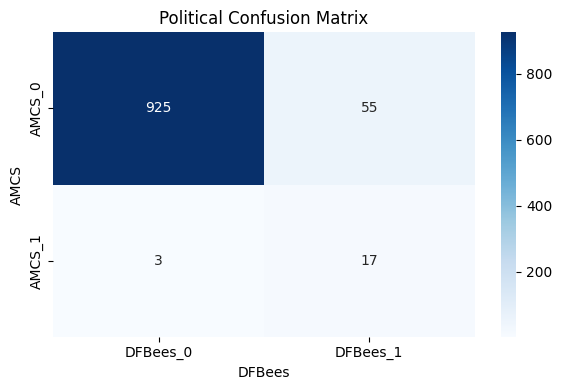


Cohen's Kappa between AMCS and DFBees: 0.3144

Confusion Matrix:
        DFBees_0  DFBees_1
AMCS_0        89        95
AMCS_1       123       693


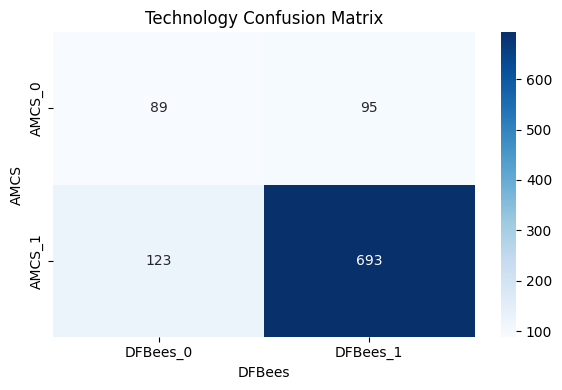

In [2]:
# For Political annotations
file = "Political_Kohens.xlsx"
ann1, ann2 = load_annotations(file, "Annotator_1_AMCS", "Annotator_2_DFBees")
analyze_kappa(ann1, ann2, label1="AMCS", label2="DFBees", title="Political Confusion Matrix")

# For Technology annotations
file = "Technology_Kohens.xlsx"
ann1, ann2 = load_annotations(file, "Annotator_1_AMCS", "Annotator_2_DFBees")
analyze_kappa(ann1, ann2, label1="AMCS", label2="DFBees", title="Technology Confusion Matrix")


Notes:
So, we have a fairly large class imbalance with our second label (Political). We can see that we have a high observed agreement but the Cohen's Kappa is relatively low in comparison. The Cohen's Kappa is still fair at 0.35. This particular dataset isn't ideal for training on Political labels because the vast majority of the samples belong to other labels, which may lead to biased model performance.